In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Fraud_check.csv')

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.shape

(600, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
dup=data.duplicated().value_counts()

In [8]:
dup

False    600
dtype: int64

In [9]:
data.shape

(600, 6)

In [10]:
data=pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [11]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [12]:
data['taxinc']=pd.cut(x=data['Taxable.Income'],bins=[10002,30000,99620],labels=['Risky','Good'])

In [13]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxinc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [14]:
data = pd.get_dummies(data,columns = ["taxinc"],drop_first=True)

In [15]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxinc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [17]:
data.corr()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxinc_Good
Taxable.Income,1.000000,-0.064387,-0.001818,-0.049232,-0.100611,0.037910,0.070628,0.688725
City.Population,-0.064387,1.000000,0.013135,0.079579,-0.007035,0.002087,-0.040098,-0.012225
Work.Experience,-0.001818,0.013135,1.000000,-0.005362,0.033347,-0.018123,-0.094559,0.001972
Undergrad_YES,-0.049232,0.079579,-0.005362,1.000000,0.015120,0.028883,-0.000267,-0.012523
Marital.Status_Married,-0.100611,-0.007035,0.033347,0.015120,1.000000,-0.520317,0.016771,-0.043178
Marital.Status_Single,0.037910,0.002087,-0.018123,0.028883,-0.520317,1.000000,0.047014,0.015820
Urban_YES,0.070628,-0.040098,-0.094559,-0.000267,0.016771,0.047014,1.000000,-0.004830
taxinc_Good,0.688725,-0.012225,0.001972,-0.012523,-0.043178,0.015820,-0.004830,1.000000


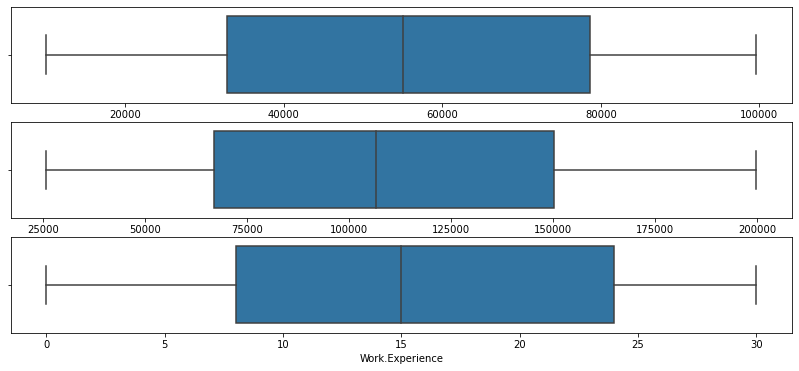

In [32]:
new=data.copy() 
fig,axes=plt.subplots(3,1,figsize=(14,6))
sns.boxplot(x='Taxable.Income',data=new,ax=axes[0])
sns.boxplot(x='City.Population',data=new,ax=axes[1])
sns.boxplot(x='Work.Experience',data=new,ax=axes[2])
plt.show()

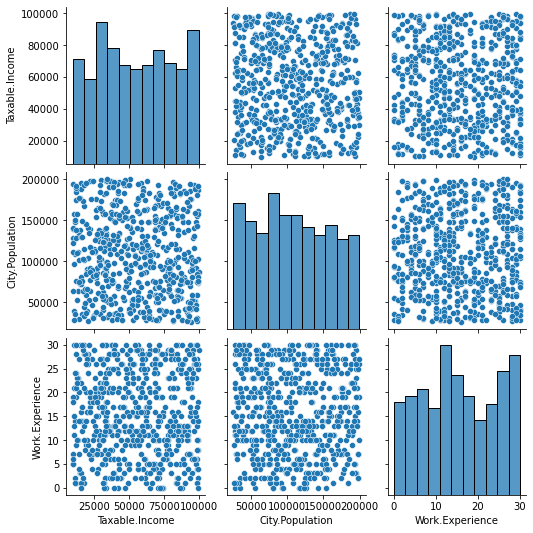

In [33]:
sns.pairplot(data)

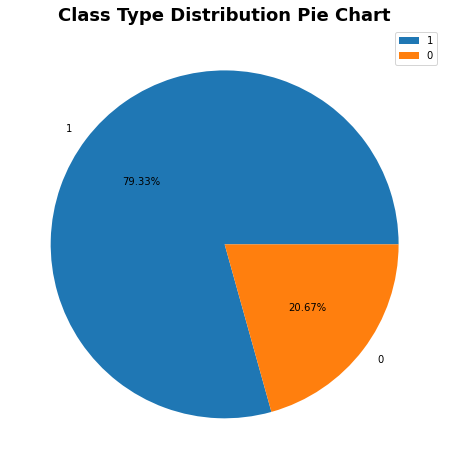

In [55]:
plt.figure(figsize = (15,8))
plt.pie(data['taxinc_Good'].value_counts(),labels=data['taxinc_Good'].unique(),
        autopct='%.2f%%')
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [58]:
data['Undergrad_YES'].value_counts()

1    312
0    288
Name: Undergrad_YES, dtype: int64

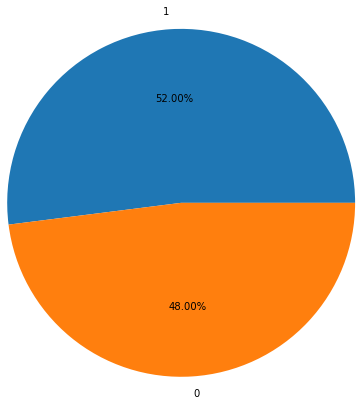

In [59]:
label=['1','0']
plt.pie(data['Undergrad_YES'].value_counts(),labels=label,radius=2,autopct='%.2f%%')
plt.ylabel(" ")
plt.show()

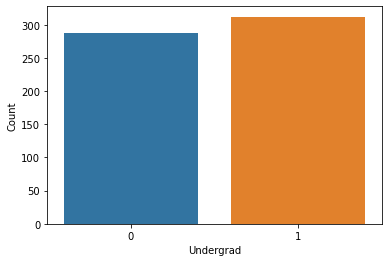

In [61]:
sns.countplot('Undergrad_YES',data=data)
plt.xlabel('Undergrad')
plt.ylabel('Count')
plt.show()

In [62]:
data['Marital.Status_Married'].value_counts()

0    406
1    194
Name: Marital.Status_Married, dtype: int64

In [63]:
data['Marital.Status_Single'].value_counts()

0    383
1    217
Name: Marital.Status_Single, dtype: int64

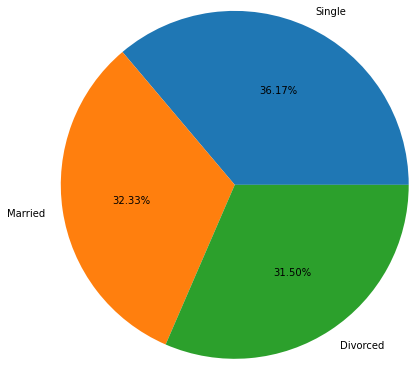

In [46]:
label=['Single','Married','Divorced' ]
plt.pie(data['Marital.Status'].value_counts(),labels=label,radius=2,autopct='%.2f%%')
plt.ylabel(" ")
plt.show()

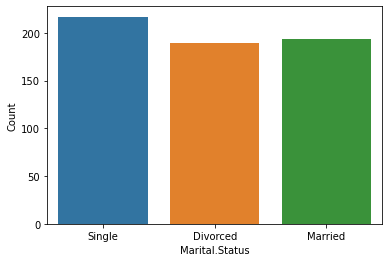

In [40]:
sns.countplot('Marital.Status',data=data)
plt.xlabel('Marital.Status')
plt.ylabel('Count')
plt.show()

In [64]:
data['Urban_YES'].value_counts()

1    302
0    298
Name: Urban_YES, dtype: int64

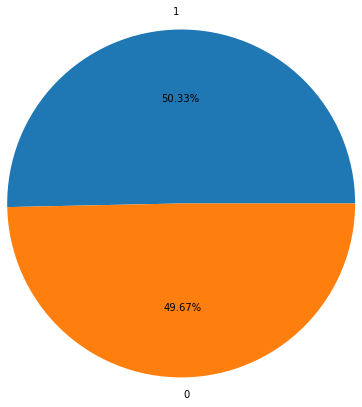

In [65]:
label=['1','0']
plt.pie(data['Urban_YES'].value_counts(),labels=label,radius=2,autopct='%.2f%%')
plt.ylabel(" ")
plt.show()

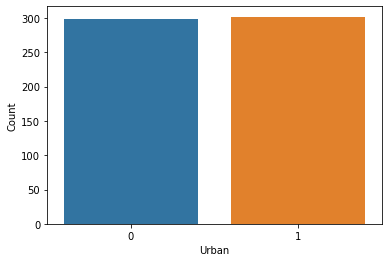

In [66]:
sns.countplot('Urban_YES',data=data)
plt.xlabel('Urban')
plt.ylabel('Count')
plt.show()

In [20]:
data['taxinc_Good'].value_counts()

1    476
0    124
Name: taxinc_Good, dtype: int64

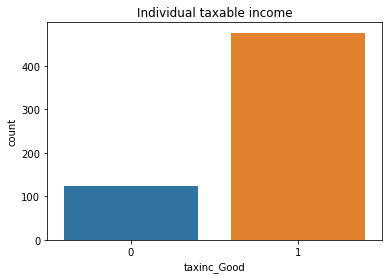

In [21]:
sns.countplot('taxinc_Good',data=data)
plt.title('Individual taxable income')
plt.show()

In [67]:
#normalization

In [22]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [23]:
# Normalized data frame
df_norm = norm_func(data.iloc[:,1:])
df_norm

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxinc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


In [24]:
x=df_norm.drop(['taxinc_Good'],axis=1)
y=df_norm['taxinc_Good']

In [25]:
x

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [26]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: taxinc_Good, Length: 600, dtype: float64

In [27]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

# Building Decision Tree Classifier using Entropy Criteria

In [28]:
model=DecisionTreeClassifier(criterion ='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

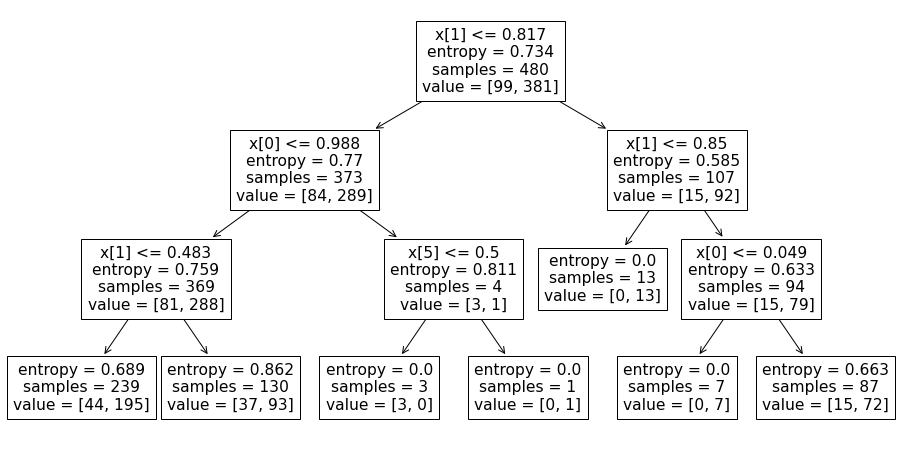

In [32]:
plt.figure(figsize=(16,8))
tree.plot_tree(model)
plt.show()

In [33]:
colnames=list(data.columns)

In [34]:
colnames

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'taxinc_Good']

In [35]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']

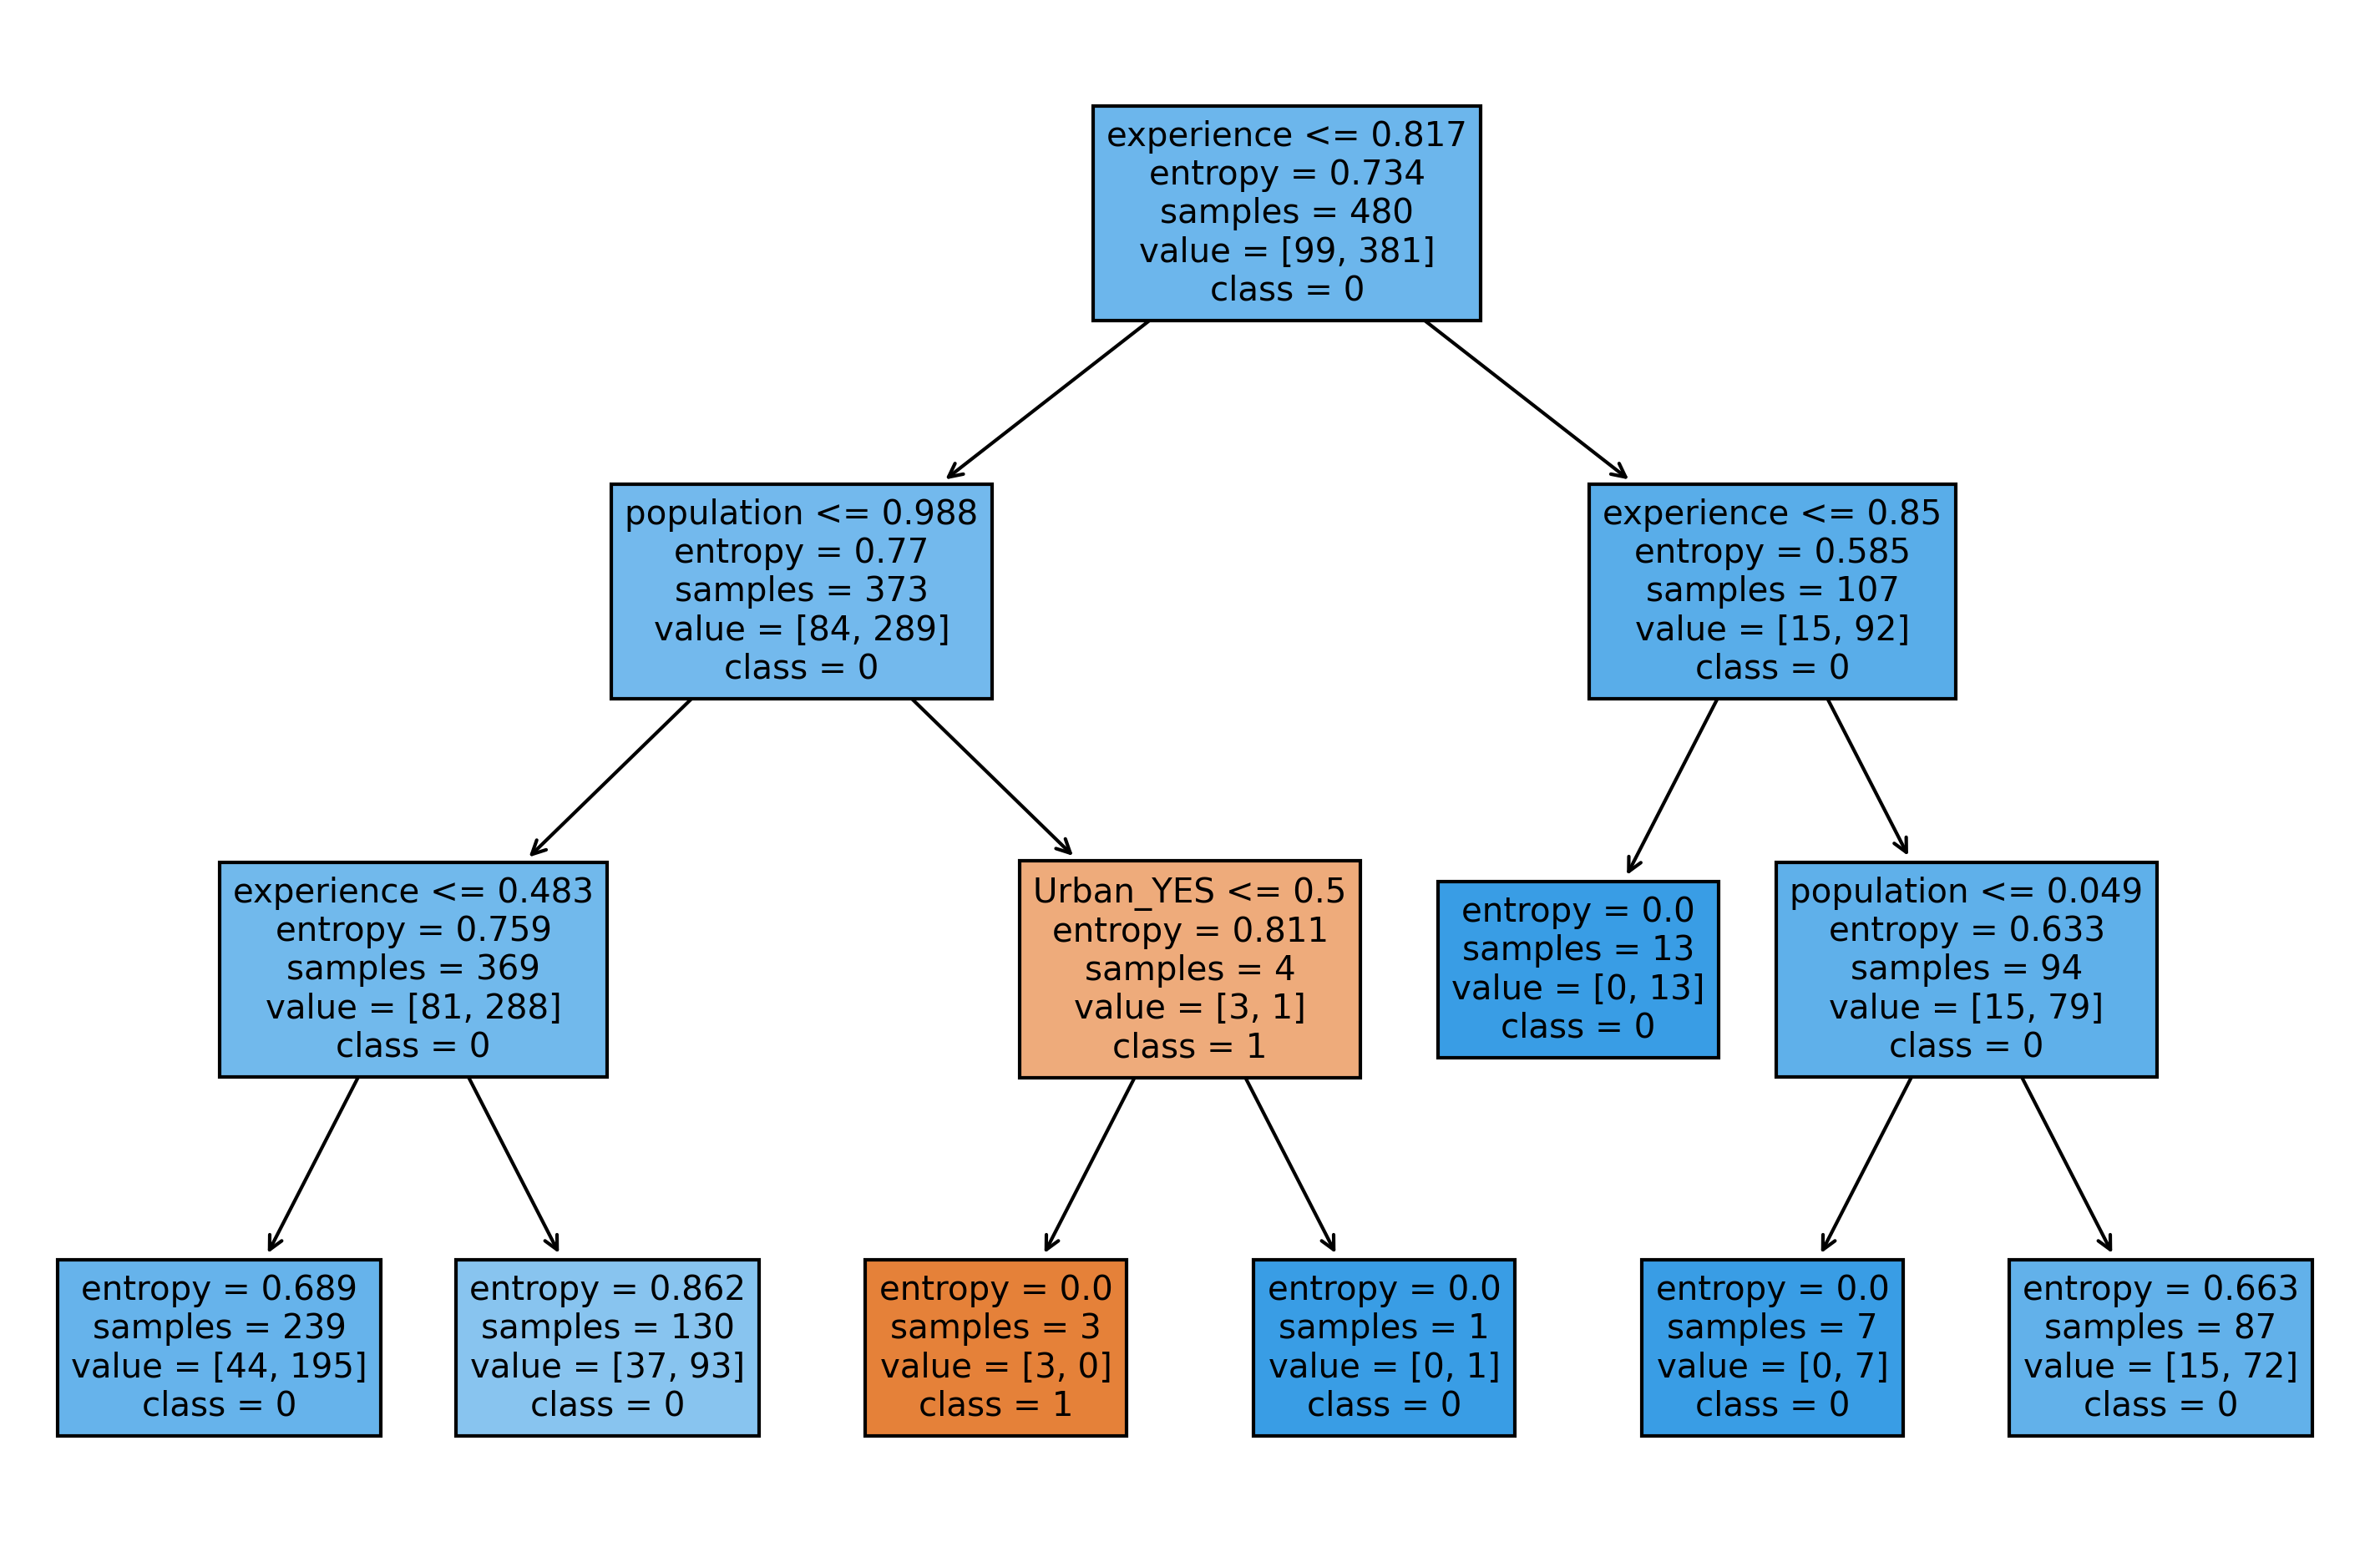

In [38]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(12,8),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [39]:
pred=model.predict(x_test)
pd.Series(pred).value_counts()

1.0    119
0.0      1
dtype: int64

In [40]:
pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [41]:
pd.crosstab(y_test,pred)

col_0,0.0,1.0
taxinc_Good,,
0.0,0,25
1.0,1,94


In [42]:
np.mean(pred==y_test)

0.7833333333333333

# Building Decision Tree Classifier using Gini Criteria

In [43]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [44]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [45]:
pred1=model.predict(x_test)
np.mean(pred==y_test)

0.7833333333333333

# Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
array=data.values

In [49]:
X=array[:,0:3]
Y=array[:,3]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [52]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [53]:
model.score(X_test,y_test)

1.0